In [262]:
#To sample from a mixture of Gaussians
import numpy as np
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)
# Define three means
#
Means = np.array([[0, 3], [3, 0], [4,4]])
# Define three covariance matrices ensuring
# they are positive definite
#
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((3,2,2))
for j in range(3):
    CovMatrices[j,:,:] = make_spd_matrix(2)
# Priors---the frequency of samples of every gaussian distribution
#
w = np.random.rand(3)
w = w / np.sum(w)
# How many data in each component (1000 in total)
#
nData = np.floor(w * 1000).astype(int)
# Draw samples from each component
#
X0 = genGaussianSamples(nData[0], Means[0,:], CovMatrices[0,:,:])
X1 = genGaussianSamples(nData[1], Means[1,:], CovMatrices[1,:,:])
X2 = genGaussianSamples(nData[2], Means[2,:], CovMatrices[2,:,:])
# Append into an array for the data we need
#
X = np.append(np.append(X0, X1, axis=0), X2, axis=0)

In [263]:
#------------test
print(len(X0))
print(len(X1))
print(len(X2))
print(len(X))

print(Means)
print(CovMatrices)
print(nData)
print(w)

291
319
389
999
[[0 3]
 [3 0]
 [4 4]]
[[[ 2.81430516 -0.51079175]
  [-0.51079175  1.09383797]]

 [[ 2.87388075  0.1054119 ]
  [ 0.1054119   0.87727724]]

 [[ 2.05227209 -0.76265231]
  [-0.76265231  0.70662259]]]
[291 319 389]
[0.29136768 0.31915556 0.38947676]


In [264]:
#1, Implement the k means
#Initial 3 cluster centers
import random
Cmeans=random.choices(X,k=3)
print(Cmeans)
print(Cmeans[0])

[array([2.29432689, 4.22596047]), array([6.26807424, 2.68172652]), array([4.72006337, 0.62417459])]
[2.29432689 4.22596047]


In [357]:
#Initial centers with terrible result
Cmeans=[np.array([3,0]),np.array([3,0]),np.array([3,3])]

In [358]:
#Iterate E step and M step until converge e.g. the cluster means no longer change
R_series=[]
Cmeans_series=[]
while True:
    #(Re)calculate R, keeping the Cmeans fixed
    R=[]#the relationship of assigments
    for x in X:
        r=[]
        for Cmean in Cmeans:
            i=np.linalg.norm(x-Cmean)
            r.append(i)
        r=[1 if Cmean==min(r) else 0 for Cmean in r ]  
        R.append(r)   
       
    #(Re)calculate Cmeans, keeping the R fixed
    S=[]
    for i in range(len(X)):
        s=np.array([R[i]]).T@ np.array([X[i]])
        S.append(s)
    Ssum=np.array(S).sum(axis=0)
    Rsum=np.array(R).sum(axis=0) 
    Nmeans=[]
    for i in range(3):
        Nmean=Ssum[i]/Rsum[i]
        Nmeans.append(Nmean)
    #Break if the cluster means are not moving any more
    if np.all(np.array(Cmeans)==np.array(Nmeans)):
        break
    #Update the cluster means and record the change of assigments and clsuter means
    Cmeans=Nmeans[:]#https://stackoverflow.com/questions/19951816/python-changes-to-my-copy-variable-affect-the-original-variable
    R_series.append(R) 
    Cmeans_series.append(Nmeans)

In [359]:
#------test
for i in Cmeans_series:
    print(i)
print(len(Cmeans_series))
print(Cmeans)
print(len(R_series))

[array([ 2.89261723, -0.03596118]), array([ 2.89261723, -0.03596118]), array([2.30132809, 3.63469473])]
[array([3.08473733, 0.07539472]), array([3.08473733, 0.07539472]), array([2.18184931, 3.68239714])]
[array([3.24993287, 0.16778195]), array([3.24993287, 0.16778195]), array([2.07409303, 3.69269729])]
[array([3.29913414, 0.21379504]), array([3.29913414, 0.21379504]), array([2.03477918, 3.69962756])]
[array([3.32287452, 0.2539    ]), array([3.32287452, 0.2539    ]), array([2.00875363, 3.7092876 ])]
[array([3.37110215, 0.3133055 ]), array([3.37110215, 0.3133055 ]), array([1.96246858, 3.71764158])]
[array([3.44164475, 0.36732102]), array([3.44164475, 0.36732102]), array([1.90717478, 3.71168985])]
[array([3.52419744, 0.42879733]), array([3.52419744, 0.42879733]), array([1.84219476, 3.70001888])]
[array([3.59452611, 0.52298578]), array([3.59452611, 0.52298578]), array([1.76153449, 3.7026554 ])]
[array([3.65002419, 0.63165531]), array([3.65002419, 0.63165531]), array([1.67162871, 3.71237786

In [360]:
#2, plot the iteration process
#define the function used in the plots
import math
import numpy as np
import matplotlib.pyplot as plt
def gauss2D(x,m,C):
    Ci = np.linalg.inv(C)#Compute the (multiplicative) inverse of a matrix.
    dC = np.linalg.det(C)#Compute the determinant of an array.
    num=np.exp(-0.5*np.dot((x-m).T, np.dot(Ci,(x-m))))
    den=2*np.pi*math.sqrt(dC)
    return num/den
def twoDGaussianPlot(nx,ny,m,C):
    x=np.linspace(-5,8,nx)#Return evenly spaced numbers over a specified interval.
    y=np.linspace(-5,8,ny)
    X,Y= np.meshgrid(x,y,indexing='ij')
    
    Z=np.zeros([nx,ny])
    for i in range(nx):
        for j in range(ny):
            xvec=np.array([X[i,j],Y[i,j]])
            Z[i,j]=gauss2D(xvec,m,C)
    return X,Y,Z 

In [361]:
#Get the boolean indexing list of every cluster in each iteration
Blists1=[]
Blists2=[]
Blists3=[]
for i in R_series: #iterate each assigments
    Blist1=[True if j[0]==1 else False for j in i]#iterate each data point assigment
    Blist2=[True if j[1]==1 else False for j in i]
    Blist3=[True if j[2]==1 else False for j in i]
    Blists1.append(Blist1)
    Blists2.append(Blist2)
    Blists3.append(Blist3)     

C:\Users\shafe_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


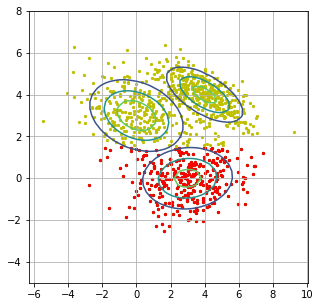

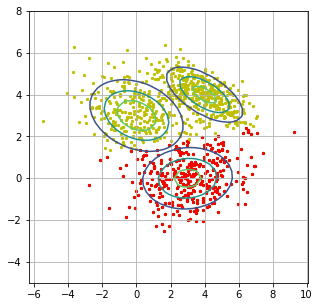

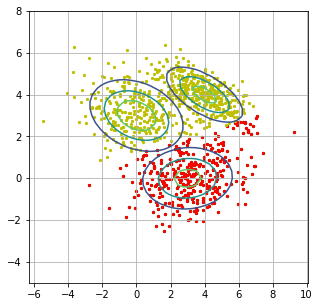

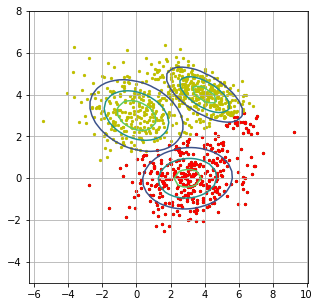

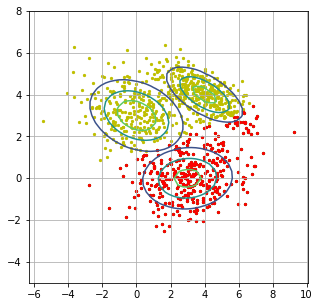

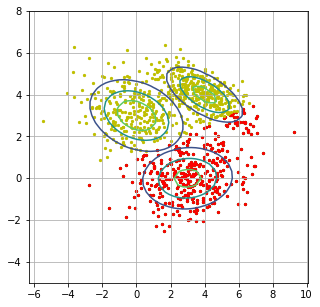

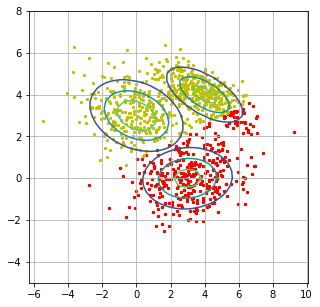

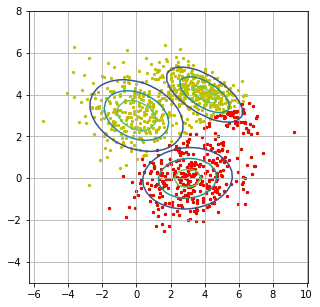

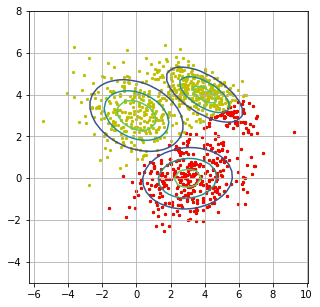

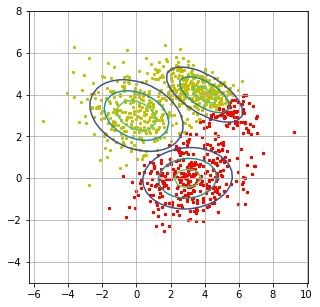

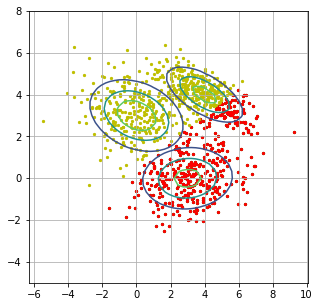

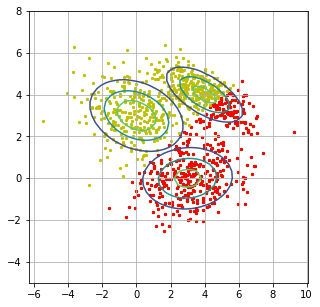

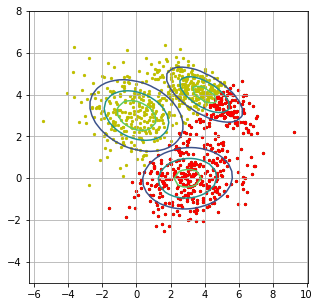

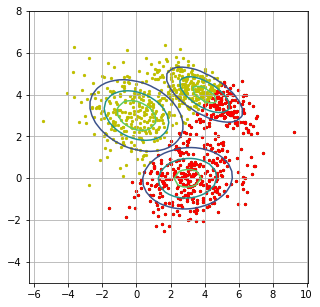

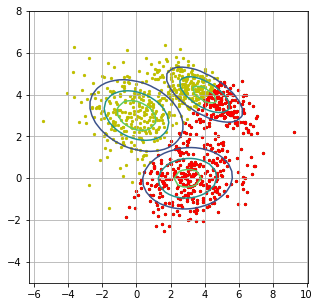

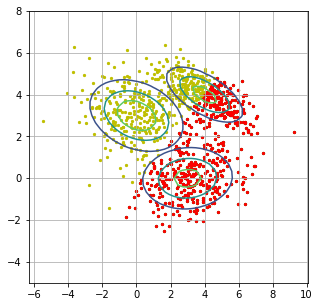

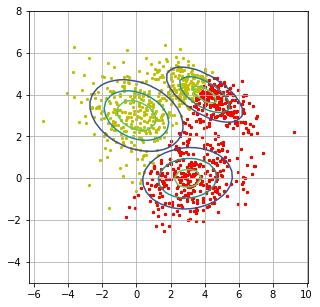

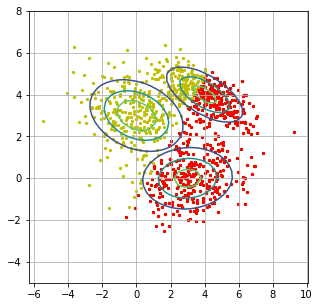

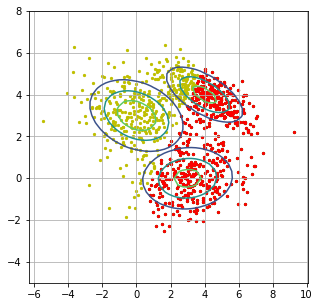

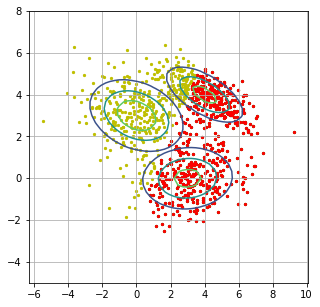

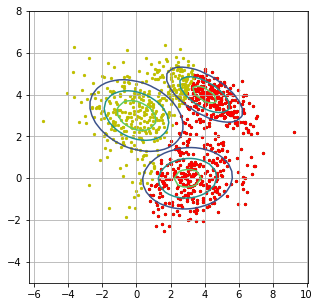

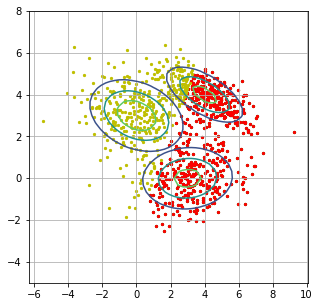

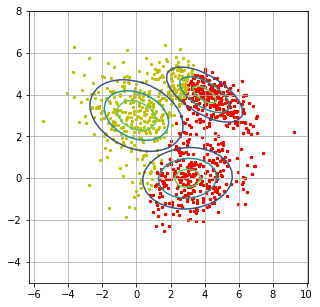

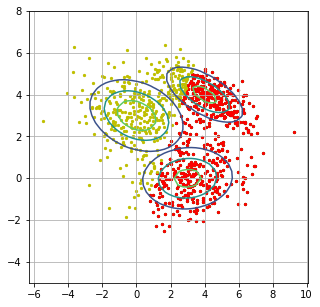

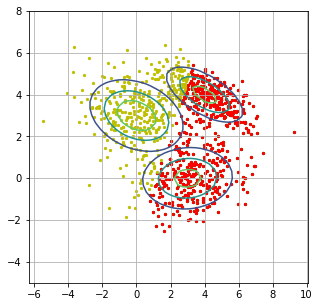

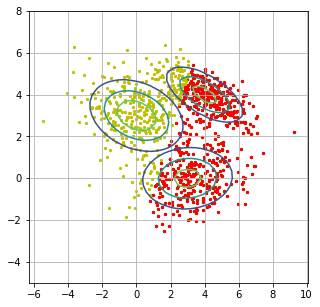

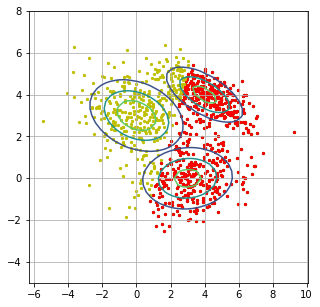

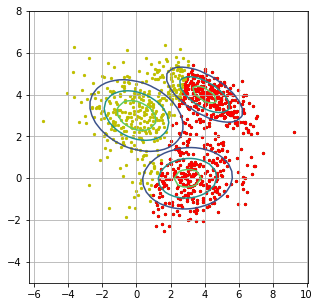

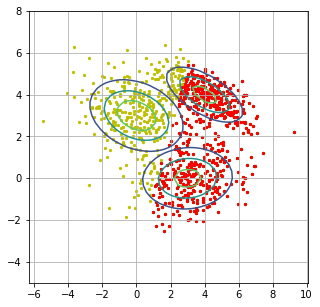

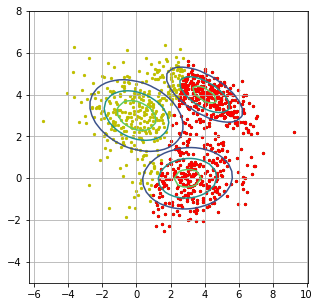

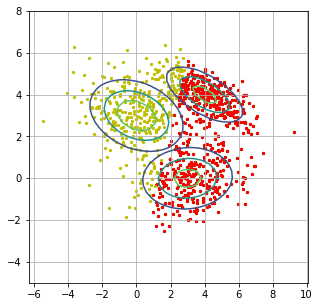

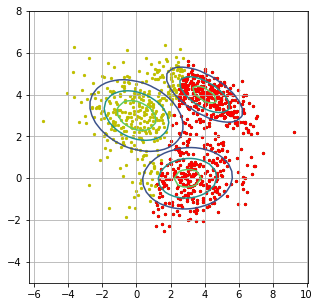

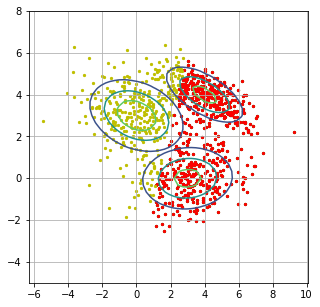

In [362]:
#plot the clsuter changing of each iteration
#nr=int(len(R_series)/3)+1
#fig, ax = plt.subplots(nrows=nr, ncols=3, figsize=(15,15))
for i in range(len(R_series)):     
    nx,ny=50,40
    plt.figure(figsize=(5,5))

    x1, y1, z1=twoDGaussianPlot(nx,ny,Means[0,:],CovMatrices[0,:,:])
    x2, y2, z2=twoDGaussianPlot(nx,ny,Means[1,:],CovMatrices[1,:,:])
    x3, y3, z3=twoDGaussianPlot(nx,ny,Means[2,:],CovMatrices[2,:,:])
    plt.contour(x1,y1,z1,3)
    plt.contour(x2,y2,z2,3)
    plt.contour(x3,y3,z3,3)
    plt.scatter(X[Blists1[i],0],X[Blists1[i],1],s=5,c='g')
    plt.scatter(X[Blists2[i],0],X[Blists2[i],1],s=5,c='r')
    plt.scatter(X[Blists3[i],0],X[Blists3[i],1],s=5,c='y')
    plt.grid(True)  
    #plt.savefig(str(i))

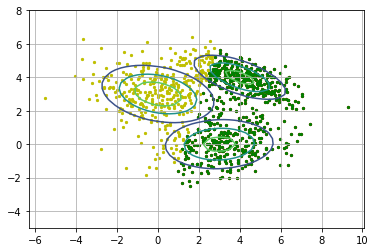

In [365]:
plt.contour(x1,y1,z1,3)
plt.contour(x2,y2,z2,3)
plt.contour(x3,y3,z3,3)
plt.scatter(X[Blists2[-1],0],X[Blists2[-1],1],s=5,c='r')
plt.scatter(X[Blists1[-1],0],X[Blists1[-1],1],s=5,c='g')
plt.scatter(X[Blists3[-1],0],X[Blists3[-1],1],s=5,c='y')
plt.grid(True)  
plt.savefig('bad')

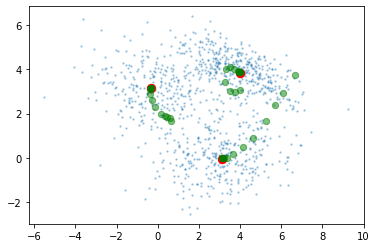

In [319]:
#plot the clsuter centers changing of each iteration
plt.scatter(X[:,0],X[:,1],s=2,alpha=0.3)
plt.scatter(np.array(Cmeans)[:,0],np.array(Cmeans)[:,1],s=70,c='r')
for i in range(len(Cmeans_series)-1):
    plt.scatter(np.array(Cmeans_series)[i][:,0],np.array(Cmeans_series)[i][:,1],s=40,c='g',alpha=0.5)
plt.savefig('trace')    

In [273]:
#3, Compare your results with the K−means clustering algorithm in sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [274]:
print(kmeans.cluster_centers_)
print(np.array(Cmeans_series[-1]))
print(kmeans.n_iter_)

[[ 3.13297664 -0.03094273]
 [ 4.01109647  3.85563248]
 [-0.32795583  3.16603885]]
[[-0.33523322  3.19477248]
 [ 4.01109647  3.85563248]
 [ 3.10686198 -0.02627795]]
5


In [215]:
#4, test the sensitivity of initial guess of the cluster centers
# reuse the code above
test=[np.array([2,0]),np.array([4,0]),np.array([2,3.5])]
print(test)

[array([2, 0]), array([4, 0]), array([2. , 3.5])]


In [271]:
#5, Select a K−class classification dataset from the UCI repository, cluster the input data using
#K−means clustering and check how well the clusters relate to the targets defined in the dataset.
import pandas as pd
iris=pd.read_csv("iris.data",index_col=False,header=None)
print(iris.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [276]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(iris.iloc[:,0:4])
#kmeans.fit(point_guards[['ppg', 'atr']])
iris['cluster'] = kmeans.labels_

In [278]:
iris.to_excel("output.xlsx")

In [8]:
#Non negative matrix factorization
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Specify the rank
#
r = 6;
# Construct a low rank matrix
#
Wtrue = np.random.rand(40,5)
Htrue = np.random.rand(5,10)
V0 = Wtrue @ Htrue
print(V0.shape)
# Dimensions of data
#
m, n = V0.shape
# Normalise columnwise
#
V = np.zeros((m,n))
for i in range(n):
    V[:,i] = V0[:,i] / np.max(V0[:,i])
# Initialize
#
W = np.random.rand(m,r);
H = np.random.rand(r,n);
MaxIter = 40000
f = np.zeros((MaxIter,1))
# Initial error
#
f[0] = np.linalg.norm(V - W @ H, ord='fro');
for iter in range(MaxIter-1):
    # Update W
    #
    ++ your code here ++
    # Update H
    #
    ++ your code here ++
    # Measure Error
    #
    f[iter+1] = np.linalg.norm(V - W @ H, ord='fro')
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(np.arange(MaxIter), np.log(f), c='m')
ax.grid(True)
print(np.linalg.norm(V - W @ H, ord='fro'))

SyntaxError: invalid syntax (<ipython-input-8-bda204c723f8>, line 34)

Text(0.5, 1.0, 'Test Data Distributions')

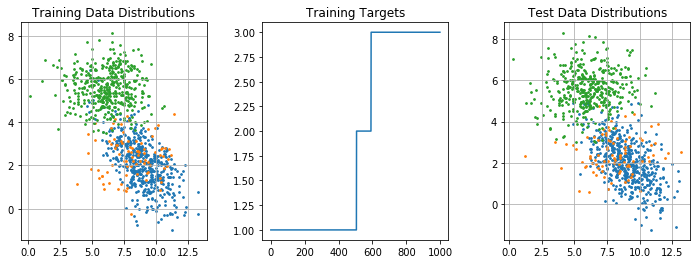

In [12]:
#Approximating Bayes Posterior: Data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def genGaussianSamples(N, m, C):
    A = np.linalg.cholesky(C)
    U = np.random.randn(N,2)
    return(U @ A.T + m)
NClasses = 3
# Priors
#
w = np.random.rand(NClasses)
w = w / np.sum(w)
N = 1000 # total data (Training = Test)
NPrior = np.floor(w * N).astype(int)
Scale = 10
Means = Scale*np.random.rand(NClasses, 2)
from sklearn.datasets import make_spd_matrix
CovMatrices = np.zeros((NClasses,2,2))
for j in range(NClasses):
    CovMatrices[j,:,:] = make_spd_matrix(2)
AllData_train = list()
for j in range(NClasses):
    AllData_train.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))
X_train = AllData_train[0]
y_train = np.ones((NPrior[0], 1))
for j in range(NClasses-1):
    Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
    X_train = np.append(X_train, Xj, axis=0)
    yj = (j+2)*np.ones((NPrior[j+1], 1))
    y_train = np.append(y_train, yj)
AllData_test = list()
for j in range(NClasses):
    AllData_test.append(genGaussianSamples(NPrior[j], Means[j,:], CovMatrices[j,:,:]))
X_test = AllData_test[0]
y_test = np.ones((NPrior[0], 1))
for j in range(NClasses-1):
    Xj = genGaussianSamples(NPrior[j+1], Means[j+1,:], CovMatrices[j+1,:,:])
    X_test = np.append(X_test, Xj, axis=0)
    yj = (j+2)*np.ones((NPrior[j+1], 1))
    y_test = np.append(y_test, yj)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
plt.subplots_adjust(wspace=0.3)
for j in range(NClasses):
    Xplt = AllData_train[j]
    ax[0].scatter(Xplt[:,0], Xplt[:,1], s=3)
ax[0].grid(True)
ax[0].set_title("Training Data Distributions")
ax[1].plot(y_train)
ax[1].set_title("Training Targets")
for j in range(NClasses):
    Xplt = AllData_test[j]
    ax[2].scatter(Xplt[:,0], Xplt[:,1], s=3)
ax[2].grid(True)
ax[2].set_title("Test Data Distributions")